# IRIS Classifier Model

 Understand the problem statement

As a Data Scientist,We all of us have the indepth knowledge of Iris Dataset.The Data Set contains 3 classes of 50 instances of each,where each class refers to species of iris flower.The main objective of the problem statement is to build a classifier model by using advance data science techniques.Here I am trying play with different algorithms and its parameters to maximize the accuracy of model.

Attribute Information:
    
Id----> Id represents each record uniquely(int)

SepalLengthCm---->Sepal lenght in centimeter(float)

SepalWidthCm---->Sepal Width in centimeter(float)

PetalLengthCm---->Peatal lenght in cm(float)

PetalWidthCm---->Petal width in cm(float)

Species----> Types of species of iris flower like setosa,versicolor,verginica(object)

In [1]:
from IPython.display import Image
Image(url='https://editor.analyticsvidhya.com/uploads/51518iris%20img1.png', width=650)

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression #Logistic Regression Algorithm
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.tree import DecisionTreeClassifier # Decision Tree Algorithm
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier#Random Forest Classifier Algorithm
from sklearn.model_selection import train_test_split

# Importing Dataset 

In [3]:
df1 = pd.read_csv("Iris.csv")

In [4]:
df=df1.copy()

In [5]:
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [6]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [7]:
df.shape

(150, 6)

# Data properties and Data cleaning 

In [8]:
#Remove unnecessary feat from dataset Id
df.drop(columns=['Id'],axis=0,inplace=True)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [10]:
#Check datatypes of each feat
df.dtypes

SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

In [11]:
#check number of records and feilds present in dataset
df.shape
print('Rows ---->',df.shape[0])
print('Columns ---->',df.shape[1])

Rows ----> 150
Columns ----> 5


In [12]:
#see the descriptive statistics
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [13]:
#check the space complexicity taken by data
df.size

750

In [14]:
#checking if there is any inconsistency in the dataset
#as we see there are no null values in the dataset, so the data can be processed
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [15]:
df.columns = ['sl','sw','pl','pw','species']
df_split_iris=df.species.str.split('-',n=-1,expand=True) #Remove prefix 'Iris-' from species col
df_split_iris.drop(columns=0,axis=1,inplace=True)#Drop 'Iris-' col
df_split_iris

,1
0,setosa
1,setosa
2,setosa
3,setosa
4,setosa
...,...
145,virginica
146,virginica
147,virginica
148,virginica


In [16]:
df3_full=df.join(df_split_iris)
df3_full

,sl,sw,pl,pw,species,1
0,5.1,3.5,1.4,0.2,Iris-setosa,setosa
1,4.9,3.0,1.4,0.2,Iris-setosa,setosa
2,4.7,3.2,1.3,0.2,Iris-setosa,setosa
3,4.6,3.1,1.5,0.2,Iris-setosa,setosa
4,5.0,3.6,1.4,0.2,Iris-setosa,setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica,virginica
146,6.3,2.5,5.0,1.9,Iris-virginica,virginica
147,6.5,3.0,5.2,2.0,Iris-virginica,virginica
148,6.2,3.4,5.4,2.3,Iris-virginica,virginica


In [17]:
df3_full.rename({1:'species1'},axis=1,inplace=True) #Rename column
df3_full

,sl,sw,pl,pw,species,species1
0,5.1,3.5,1.4,0.2,Iris-setosa,setosa
1,4.9,3.0,1.4,0.2,Iris-setosa,setosa
2,4.7,3.2,1.3,0.2,Iris-setosa,setosa
3,4.6,3.1,1.5,0.2,Iris-setosa,setosa
4,5.0,3.6,1.4,0.2,Iris-setosa,setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica,virginica
146,6.3,2.5,5.0,1.9,Iris-virginica,virginica
147,6.5,3.0,5.2,2.0,Iris-virginica,virginica
148,6.2,3.4,5.4,2.3,Iris-virginica,virginica


In [18]:
df3_full.drop(columns='species',axis=1,inplace=True) #Drop excessive column

In [19]:
#final dataframe
df3_full

,sl,sw,pl,pw,species1
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [20]:
df3_full.shape #check propertise like shape

(150, 5)

In [21]:
#check for missing entries
df3_full.isna() 

,sl,sw,pl,pw,species1
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
145,False,False,False,False,False
146,False,False,False,False,False
147,False,False,False,False,False
148,False,False,False,False,False


In [22]:
#In each feat,count of missing entries
df3_full.isna().sum()

sl          0
sw          0
pl          0
pw          0
species1    0
dtype: int64

In [23]:
df3_full.corr(numeric_only=True)
 # check the correlation matrix

,sl,sw,pl,pw
sl,1.000000,-0.109369,0.871754,0.817954
sw,-0.109369,1.000000,-0.420516,-0.356544
pl,0.871754,-0.420516,1.000000,0.962757
pw,0.817954,-0.356544,0.962757,1.000000


In [24]:
#statistical description of numerical  data only
df3_full.describe()

,sl,sw,pl,pw
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [25]:
#categoriwise frequency of data
df3_full.species1.value_counts()

species1
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

# Data Visualisation

<AxesSubplot:xlabel='sl', ylabel='pl'>

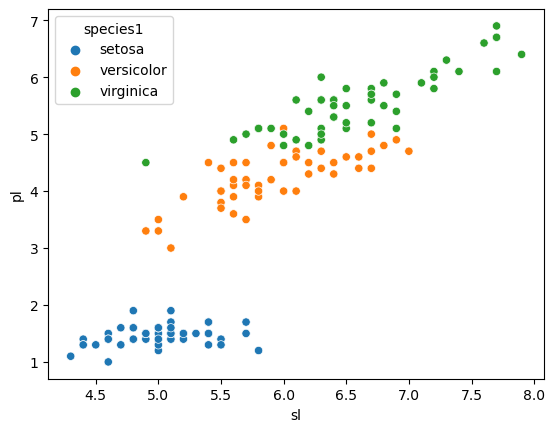

In [26]:
sns.scatterplot(x=df3_full.sl,y=df3_full.pl,hue=df3_full.species1)

The above graph shows relationship between the sepal length and width.It also shows that species setosa having lesser petal lenght as compared to versicolor and verginica. Now we will check relationship between the petal length and width.

<AxesSubplot:xlabel='pl', ylabel='pw'>

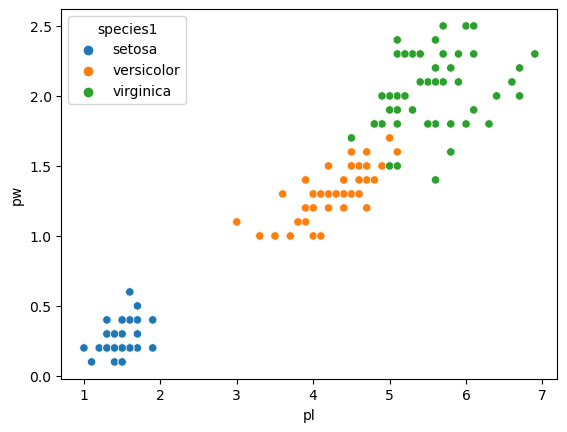

In [27]:
sns.scatterplot(x=df3_full.pl,y=df3_full.pw,hue=df3_full.species1)

As we can see that the Petal Features are giving a better cluster division compared to the Sepal features. This is an indication that the Petals can help in better and accurate Predictions over the Sepal. We will check that later.

<AxesSubplot:xlabel='sl', ylabel='pw'>

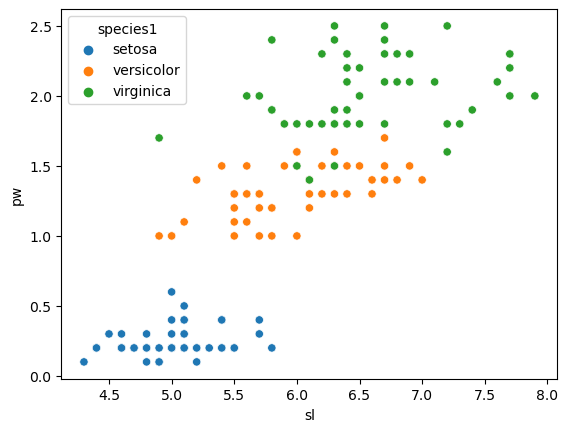

In [28]:
sns.scatterplot(x=df3_full.sl,y=df3_full.pw,hue=df3_full.species1)

<AxesSubplot:xlabel='sw', ylabel='pl'>

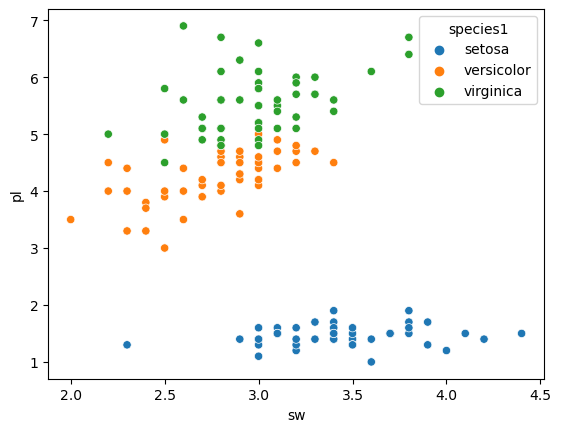

In [29]:
sns.scatterplot(x=df3_full.sw,y=df3_full.pl,hue=df3_full.species1)

From both above scatter plots we can clearly see that sw and pl data distribution and not represents specific pattern

In [30]:
df3_full.columns # check column names

Index(['sl', 'sw', 'pl', 'pw', 'species1'], dtype='object')

<AxesSubplot:xlabel='species1', ylabel='sw'>

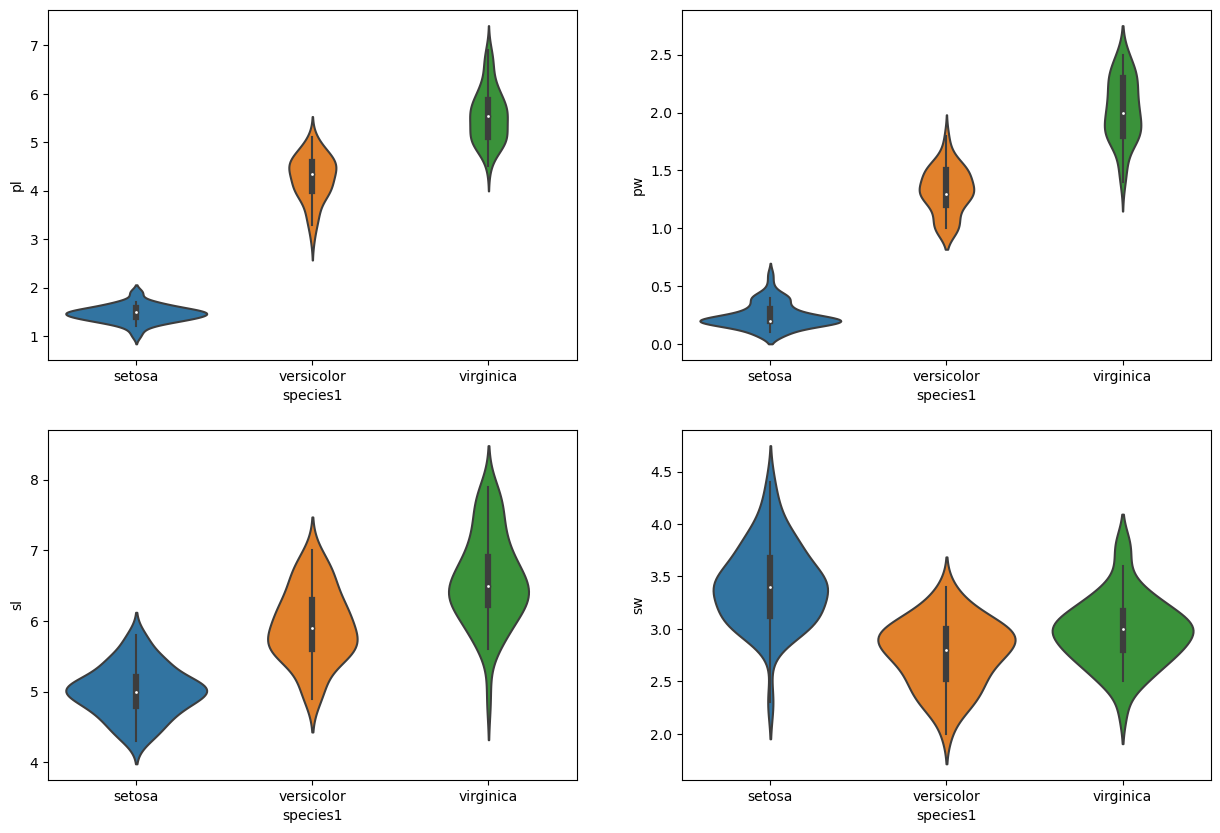

In [31]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.violinplot(x='species1',y='pl',data=df3_full)
plt.subplot(2,2,2)
sns.violinplot(x='species1',y='pw',data=df3_full)
plt.subplot(2,2,3)
sns.violinplot(x='species1',y='sl',data=df3_full)
plt.subplot(2,2,4)
sns.violinplot(x='species1',y='sw',data=df3_full)

The violinplot shows density of the length and width in the species. The thinner part denotes that there is less density whereas the fatter part conveys higher density

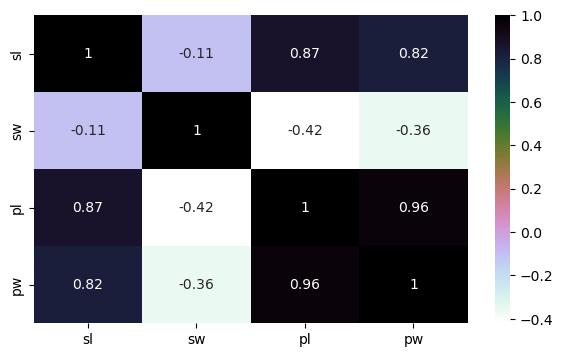

In [32]:
plt.figure(figsize=(7,4)) 
sns.heatmap(df3_full.corr(numeric_only=True), annot=True, cmap='cubehelix_r') 
plt.show()

Observation--->

The Sepal Width and Length are not correlated The Petal Width and Length are highly correlated

We will use all the features for training the algorithm and check the accuracy.

Then we will use 1 Petal Feature and 1 Sepal Feature to check the accuracy of the algorithm as we are using only 2 features that are not correlated. Thus we can have a variance in the dataset which may help in better accuracy. We will check it later.

# Converting categorical features into numerical features

In [33]:
from sklearn.preprocessing import LabelEncoder
 
# Creating a instance of label Encoder.
le = LabelEncoder()
 
# Using .fit_transform function to fit label
# encoder and return encoded label
le.fit_transform(df3_full['species1'])
df3_full['species1']=le.fit_transform(df3_full['species1'])
df3_full

,sl,sw,pl,pw,species1
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [34]:
df3_full


,sl,sw,pl,pw,species1
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


# Divide independent feat and target feat to train model

In [35]:
x = df3_full.iloc[:,:-1]
x

,sl,sw,pl,pw
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [36]:
y = df3_full.iloc[:,-1]
y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: species1, Length: 150, dtype: int32

In [37]:
df3_full.species1.unique()

array([0, 1, 2])

In [38]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.3,random_state=32)

In [39]:
xtrain.shape

(105, 4)

In [40]:
ytrain.shape

(105,)

In [41]:
xtest.shape

(45, 4)

In [42]:
ytest.shape

(45,)

# Model

In [43]:
from sklearn.tree import DecisionTreeClassifier # Decision Tree Algorithm
from sklearn import tree

In [44]:
model = tree.DecisionTreeClassifier()
model.fit(xtrain,ytrain)
model_prediction = model.predict(xtrain)

In [45]:
print(model.score(xtrain,ytrain)*100)
print(model.score(xtest,ytest)*100)

100.0
97.77777777777777


In [46]:
accuracy_score(ytrain,model_prediction)*100

100.0

# Calculating Accuracy Score 

In [47]:
model.score(xtest,ytest)*100

97.77777777777777

# Testing random values

In [48]:
model.predict([[6.8, 3.2, 5.9, 2.3]])

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([2])

Observations:

Using Petals over Sepal for training the data gives a much better accuracy. This was expected as we saw in the heatmap above that the correlation between the Sepal Width and Length was very low whereas the correlation between Petal Width and Length was very high. Thus we have just implemented some of the common Machine Learning. Since the dataset is small with very few features, I didn't cover some concepts as they would be relevant when we have many features.

I have compiled a notebook covering some advanced ML concepts using a larger dataset. Have a look at that tooo.
